#### Implementation of A* Path Finding algorithm in Python

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

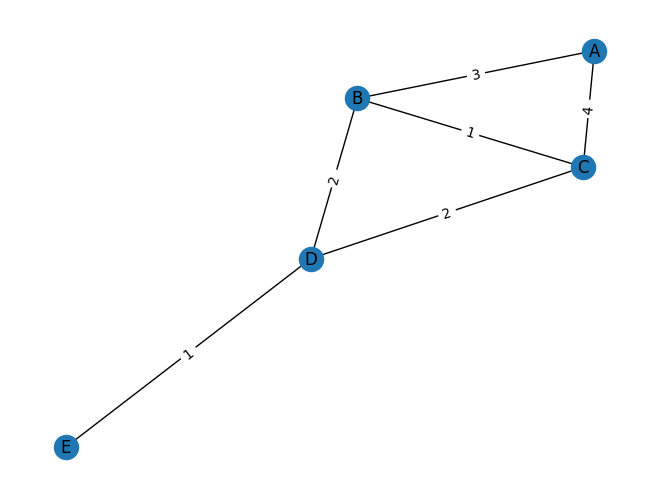

In [49]:
# Create a directed graph
G = nx.Graph()

G.add_node('A', pos=(0, 0))
G.add_node('B', pos=(1, 2))
G.add_node('C', pos=(3, 1))
G.add_node('D', pos=(5, 0))
G.add_node('E', pos=(4, 3))

G.add_edge('A', 'B', weight=3)
G.add_edge('A', 'C', weight=4)
G.add_edge('B', 'C', weight=1)
G.add_edge('C', 'D', weight=2)
G.add_edge('D', 'B', weight=2)
G.add_edge('D', 'E', weight=6)
G.add_edge('E', 'D', weight=1)


def draw_graph(G: nx.Graph, shortest_paths=set()):
    positions = nx.spring_layout(G, seed=3)
    nx.draw(G, pos=positions)
    nx.draw_networkx_nodes(G, pos=positions, nodelist=shortest_paths, node_color='red')
    nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=nx.get_edge_attributes(G, 'weight'))
    nx.draw_networkx_labels(G, pos=positions, labels={node: str(node) for node in G.nodes})
    plt.show()
    
draw_graph(G)

In [50]:
def astar(graph, start, target, heuristic):
    # Initialize distances to all vertices as infinity
    distances = {node: float('infinity') for node in graph.nodes()}
    # The distance to the starting vertex is 0
    distances[start] = 0
    # Initialize priority queue with the starting vertex and its distance
    priority_queue = [(0, start)]
    # Keep track of the previous node for each node to reconstruct the path
    previous = {}

    while priority_queue:
        # Pop the vertex with the smallest priority (f-value) from the priority queue
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # If the target node is reached, reconstruct and return the path
        if current_vertex == target:
            path = []
            while current_vertex is not None:
                path.insert(0, current_vertex)
                current_vertex = previous.get(current_vertex)
            return distances[target], path

        # Loop through neighbors of the current vertex
        for neighbor in graph.neighbors(current_vertex):
            # Calculate the tentative distance to the neighbor
            weight = graph[current_vertex][neighbor]['weight']
            tentative_distance = distances[current_vertex] + weight
            # If a shorter path to neighbor is found, update its distance and previous node
            if tentative_distance < distances[neighbor]:
                distances[neighbor] = tentative_distance
                previous[neighbor] = current_vertex
                # Calculate the priority (f-value) for the neighbor using the heuristic
                priority = tentative_distance + heuristic(neighbor, target)
                # Push the priority and neighbor into the priority queue
                heapq.heappush(priority_queue, (priority, neighbor))

    # If the target node is not reachable from the start node, return infinity and an empty path
    return float('infinity'), []

# Heuristic using Euclidean Distance
def euclidean_distance(a, b):
    x1, y1 = G.nodes[a]['pos']
    x2, y2 = G.nodes[b]['pos']
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** .5

In [51]:
start_node = 'A'
end_node = 'E'

In [55]:
shortest_distance, shortest_path = astar(G, start_node, end_node, heuristic=euclidean_distance)

In [56]:
shortest_distance

6

In [57]:
shortest_path

['A', 'B', 'D', 'E']

In [58]:
nx.astar_path(G, 'A', 'E')

['A', 'B', 'D', 'E']

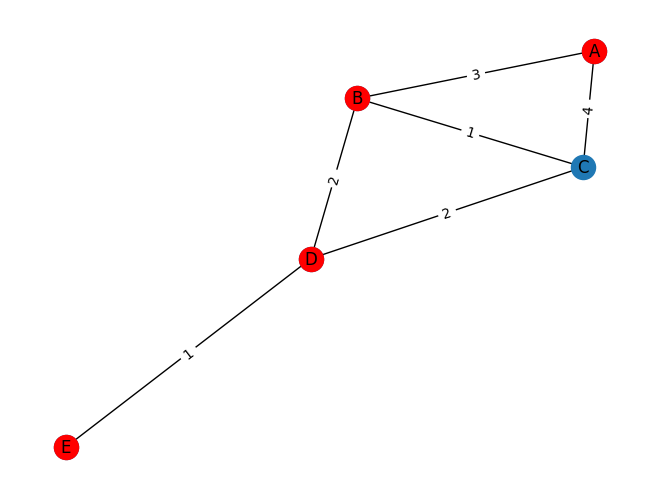

In [59]:
draw_graph(G, shortest_paths=shortest_path)